## Análisis de Datos: Tendencia Central

### Preliminares

Antes de entrar en materia, ejecuta la celda siguiente:

In [2]:
import pandas as pd

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

Dentro de lo que se conoce como análisis univariante (descripición de cada variable por separado. Si es una variable dispersa, tiene outliers, su rango...) en esta sesión vamos a ver las medidas estadísticas que se conconen como medidas de tendencia central.



Y antes de entrar en medias, modas, medianas y frecuencias, que ya hemos mencionado y usado antes, ¿por qué queremos ver este tipo de medidas?

### Por qué y para qué

+ De primeras, **permiten resumir los datos**, quizás muy mucho, pero de una forma consistente y con criterio. Por ejemplo, en el caso del seguro, ¿cuánto gana la empresa más o menos por cliente? y en el caso del avión, si quisiera tener un valor de referencia del consumo de combustible, ¿qué valor darías, de todos los que hay? 

Pues eso, las medidas de tendencia central dan una visión muy resumida pero entendible de los datos. Y con un criterio defendible, se llaman así porque indican el punto central o el **valor típico** de un conjunto de datos. Estas medidas "tienden" a ubicarse en el centro de la distribución de los datos. (De ahí su nombre)

+ Además permiten hacer **comparaciones**, quizás gruesas, pero lo permiten, si quiero saber en el caso de las compañías si he consumido más en Junio que Julio podrías comparar esas medidas. Ah, sí las medidas de tendencia central son una por variable. O incluso cuando luego veamos el consumo por compañía o simplemente por vuelo podremos compararlo con la tendencia central que estemos usando y decidir si es un vuelo "más o menos" típico por ejemplo o si hay alguno que se desvía mucho, etc. 

+ Un sólo valor que en función de la distribución puede servirnos para **tomar decisiones**.

+ Finalmente, son la **base de cálculos más complicados** y, en general, más significativos.



Es decir como primer análisis no deja de tener su valor, además de ser muy sencillo. Veámoslas



## Medidas de tendencia central

Las medidas más comunes, sin contar las medidas de posición, son:


* **Media**

* **Moda**

* **Mediana**



  
      

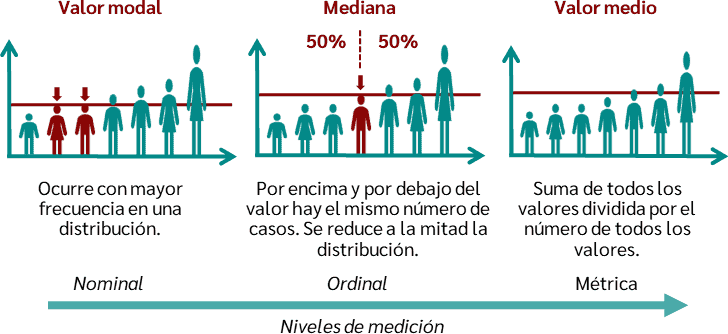




Además fijate que son medidas que aplican cada una a un tipo de variable:

* La media la aplicamos a numéricas discretas o continuas  
* La mediana la podemos aplicar a numéricas pero tiene más sentido con categóricas ordinales (donde podemos establecer una relación de orden)  
* La moda la podemos aplicar a las categóricas nominales (y también a las ordinales), no tiene mucho sentido con las numéricas con una cardinalidad media y alta  

## Media 
La [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) es el valor obtenido al sumar todos los *[datos](https://es.wikipedia.org/wiki/Dato)* y dividir el resultado entre el número total elementos. Se suele representar con la letra griega $\mu$. Si tenemos una [muestra](https://es.wikipedia.org/wiki/Muestra_estad%C3%ADstica) de $n$ valores, $x_i$, la *media aritmética*, $\mu$, es la suma de los valores divididos por el numero de elementos; en otras palabras:
$$\mu = \frac{1}{n} \sum_{i}x_i$$


Está bien que te sepas la fórmula, aunque en Python emplearemos funciones. Los métodos de pandas y si no np.mean.



Ojo sólo tenlo en cuenta con los valores numéricos (este es uno de los motivos por los que era interesante pasar las variables "Number" de categóricas a numéricas discretas, se les puede aplicar con sentido la media)

### Aplicación al Análisis

Sí, obtén la media de todas tus variables (numéricas y guárdala, aunque con Pandas es inmediato obtenerla)


#### Caso 1. Seguros: Medias

In [3]:
df_seguros.describe().loc["mean"]

customer_lifetime_value           8004.940475
income                           37657.380009
monthly_premium_auto                93.219291
months_since_last_claim             15.097000
months_since_policy_inception       48.064594
number_of_open_complaints            0.384388
number_of_policies                   2.966170
total_claim_amount                 434.088794
Name: mean, dtype: float64

Y esto nos dice mucho, no simplemente nos da una idea pero nos permite describir la compañía de una forma resumida:
* Los ingresos medios de nuestros clientes son de 37K$ anuales
* Nuestro valor medio prolongado en el tiempo es de 8K$, es decir en media un cliente suele aportar en su vida con la compañía ese valor
* La prima media premium mensual de un seguro de coche es de 93$, es decir que cobramos unos 1116K$ en media a los clientes premium
* Los partes de un cliente suelen distanciarse en media unos 15 meses

Bueno, igual no nos permite todavía mucho, pero sí tener una idea de por donde se mueve la empresa, si ahora quisieramos compararla con otra, o con otros precios o analizar otros valores tendríamos una "base de comparación" (o base line). Por ejemplo podremos saber quién es un buen cliente (por encima o muy por encima de la media de ingresos, o por debajo de la media de partes o por encima de la media de seguros contratados...)

### Caso 2. Viajes: Medias

In [4]:
df_air_jun.describe().loc["mean"]

distancia       8071.003333
consumo_kg     68240.520508
duracion         635.873333
ingresos      418768.851500
Name: mean, dtype: float64

A diferencia del primer caso que analizamos una compañía, aquí analizamos un "sector", ¿qué podríamos decir del mismo?

## Mediana 
La <a href="https://es.wikipedia.org/wiki/Mediana_(estad%C3%ADstica)">mediana</a> es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor. Se representa con $\widetilde{x}$.

**¿Cuándo usar media y cuánso usar mediana?** Si los datos están concentrados: media. Si son asimétricos, la mediana será más representativa de la centralidad. Lo veremos mejor cuando usemos visualización para el análisis y en un minuto cuando lo apliquemos a los seguros.

¿Cómo se calcula la mediana? Dado el siguiente vector:

```Python
x = [  4,  6,  2,  1,  7,  8, 11,  3]
```

Para calcular la mediana tendríamos que ordenar los datos, y escoger el valor que caiga justo en medio

```Python
x = [  4,  6,  2,  1,  7,  8, 11,  3]
y = [  1,  2,  3,  4,  6,  7,  8, 11]
```

Si el conjunto fuese impar, lo tendríamos fácil. Pero como es par, elegimos la media entre los dos valores que caen en el centro (4 y 6 = 5).


Esto nos permite abstraernos de si existen valores muy extremos tanto por arriba como por abajo... Veamos su aplicación a nuestros casos

#### Caso 1. Seguros: Mediana

In [5]:
df_seguros.describe().loc["50%"]

customer_lifetime_value           5780.182197
income                           33889.500000
monthly_premium_auto                83.000000
months_since_last_claim             14.000000
months_since_policy_inception       48.000000
number_of_open_complaints            0.000000
number_of_policies                   2.000000
total_claim_amount                 383.945434
Name: 50%, dtype: float64

Comparándola con la media, podemos ver que quizás es mejor caracterizar algunos valores con la "mediana" para no llevarnos a subestimar o sobreestimar algunas características:
+ En el caso de CLV, fijate que hay más de 2000$ de diferencia, eso es porque hay algún valor por encima de la media demasiado alto que descompensa la media (cosa que suele pasar mucho con el tema ingresos o salarios [imagina que eres uno de los que vende entradas en el Real Madrid y calculamos el salario medio incluyendo a los jugadores probablemente ese salario medio no te represente para nada, lo mismo pasa cuando se miden ingresos por cine y no por película,etc,etc])
+ Incluso el número de polizas o el total de medio de "partes" podríamos pensar que es mejor usar la mediana.

Para hacer un rápido check veamos los valores máximos:



In [6]:
df_seguros.describe().loc["max"]

customer_lifetime_value          83325.381190
income                           99981.000000
monthly_premium_auto               298.000000
months_since_last_claim             35.000000
months_since_policy_inception       99.000000
number_of_open_complaints            5.000000
number_of_policies                   9.000000
total_claim_amount                2893.239678
Name: max, dtype: float64

#### Caso 2. Viajes

Apliquemos el mismo cálculo:

In [7]:
df_air_jun.describe().loc["50%"]

distancia       6877.000
consumo_kg     36033.998
duracion         542.000
ingresos      375481.745
Name: 50%, dtype: float64

Nos puede pasar lo mismo con las distancias y sobre todo con los consumos (la media está casi un 1.75 por encima de la mediana). Y esto nos da pie para que vayas ya apuntando cosas: 
 
    * Valores que destacan -> Me los apunto como interesantes para seguir. Destacan es porque son más altos de lo que podríamos esperar o quisieramos, o más bajos. O van en dirección contraria, crecen cuando esperaoms que decrezcan, o viceversa... O van contra lo que sabemos de otros casos parecidos... Esto desde un análisis sin dirección previsa son puntos importantes para ir tomando nota.  
    
    * En el caso de las diferencias entre mediana y moda, además de decirnos cuál puede ser mejor para representar una variable, lo que nos indican es que hay dispersión de datos (con posibles anomalías o no, asimetrías) como veremos en un par de sesiones.  

En definitiva, sin ser un gran mensajes si que me apuntaría:
- Mirar distribuciones de CLV, mirar distribuciones de claims.
- Mirar distribuciones de consumos, y de distancias.

## Moda 
La <a href="https://es.wikipedia.org/wiki/Moda_(estad%C3%ADstica)">moda</a> es el valor que tiene mayor frecuencia absoluta. Se representa con $M_0$. La moda puede ser compartida por varios valores.


La moda es un valor que tiene sentido en las variables categóricas, nos va a decir que valor tiene mayor frecuencia absoluta. Es como hacer un value_counts y quedarse con el indice del primer valor:

#### Caso 1. Seguros: Moda

Obtengamos la moda de todas nuestras variables consideradas como categóricas:

In [8]:
categoricas_seguros = [ # Sí, conviene pasar la tabla a listas python :-)
    "state",
    "response",
    "coverage",
    "education",
    "employmentstatus",
    "gender",
    "location_code",
    "marital_status",
    "policy_type",
    "policy",
    "renew_offer_type",
    "sales_channel",
    "vehicle_class",
    "vehicle_size"
]




In [9]:
df_seguros[categoricas_seguros].mode().T

,0
state,California
response,No
coverage,Basic
education,Bachelor
employmentstatus,Employed
gender,F
location_code,Suburban
marital_status,Married
policy_type,Personal Auto
policy,Personal L3


Bueno, ya vamos viendo algo más, este podría decirse que es un perfil "típico" (pero sin convertir la referencia en lo absoluto):
- Un cliente típico (podríamos pensar): mujer, californiana, con estudios de nivel Bachelor, empleada por cuenta ajena, casada, con una cobertura básica sobre su coche personal, de tamaño medio y cuatro puertas.

¿Esto es mucho o poco? Bueno para alguien que quiera saber el perfil tipico, es la respuesta a su pregunta. ¿Sirve para algo? Si, para decidir si me interesa otro perfil y poner foco en él, para ahondar en este...

Recuerda que nos han pedido el análisis demográfico para el CLV y la respuesta, podríamos calcular el CLV y la respuesta media para este cliente tipo, por ejemplo y luego ver como cambia eso valores (CLV y respuesta) al cambiar los valores de los perfiles y así localizar los que tienen mejor CLV, los que peor, los que tienen mejor y peor respuesta... 

Nota: En realiad no es la forma correcta de estimar el perfil típico, en los ejercicios veremos la forma más correcta y la compararemos con esta.


#### Caso 2.

Aplicado a nuestro dataset de viajes:


In [11]:

variables_categoricas_viajes = [
    "aircompany",
    "origen",
    "destino",
    "avion",
    "con_escala"
]


In [12]:
df_air_jun[variables_categoricas_viajes].mode().T

,0
aircompany,TabarAir
origen,Bali
destino,Ginebra
avion,Boeing 747
con_escala,False


En este caso, podemos decir:
- La compañía que más vuela es TabarAir
- La ciudad con más conexiones de salida es Bali
- Ginebra es el destino más frecuente [la gente huye de Bali con el dinero a Ginebra]
- El avión más usado el Boeing 747
- La mayoría de los vuelos no tiene escala

Ojo a las palabras, la mayoria en este caso es ganar por 1, con que haya un vuelo más sin escalas que con escalas ya es la mayoría. Y lo mismo para el caso de las modas de las categóricas del caso de los Seguros, por eso además de las modas es bueno estudiar las frecuencias...